In [71]:
import pandas as pd
import numpy as np

## Loan
A loan has 3 parameters: capital $(capital)$, annual interest rate $(r_a)$ and duration $(T)$.

### Monthly payment
We usually see banks offering a fixed monthly payment $x$ instead of variable monthly payments. The interest is paid every month on the remaining capital with the monthly interest rate $$r = \sqrt[12]{1+r_a}-1.$$
The capital payment is the difference between the monthly payment and the interest.
<br>
<br>
We give the recurrence relation for the remaining capital $R_k$ at the end of month $k$ with $R_0 = capital$ and $R_T = 0$.
<br>
We use $I_k = R_{k-1} \cdot r$ for the interest paid in month $k$ and $C_k = x - I_k$ for the capital payment in month $k$.

$$R_k = R_{k-1} \cdot (1 + r) - x$$

Therefore
$$R_T - \dfrac{x}{r} = (1+r)^{T} \cdot (R_{0} - \dfrac{x}{r})$$
i.e.
$$x = \dfrac{capital \cdot r \cdot (1+r)^T}{(1+r)^T - 1}$$

In [63]:
def get_loan(capital, years, annual_interest_rate, fixed_monthly_payment):
    """
    Create a df with a row per month to record: remaining capital, interest, capital payment, payment
    """
    # loan parameters
    months = years * 12
    monthly_interest_rate = (1 + annual_interest_rate) ** (1 / 12) - 1

    # fixed monthly payment
    if fixed_monthly_payment:
        monthly_payment = capital * monthly_interest_rate * ( ((1+monthly_interest_rate)**months) / ((1+monthly_interest_rate)**months - 1) )

    # loan df
    loan = pd.DataFrame(index=range(months+1), columns=['remaining_capital', 'interest', 'capital_payment', 'payment'])

    # initialize
    loan.iloc[0] = [capital, 0, 0, 0]

    for m in range(1, months+1):
        # new interest is the remaining capital times the monthly interest rate
        loan.iloc[m]['interest'] = loan.iloc[m-1]['remaining_capital'] * monthly_interest_rate

        # fixed monthly payments are special
        if fixed_monthly_payment:
            loan.iloc[m]['capital_payment'] = monthly_payment - loan.iloc[m]['interest']
        else:
            loan.iloc[m]['capital_payment'] = capital / months

        # update remaining capital
        loan.iloc[m]['remaining_capital'] = loan.iloc[m-1]['remaining_capital'] - loan.iloc[m]['capital_payment']
        
        # payment
        loan.iloc[m]['payment'] = loan.iloc[m]['capital_payment'] + loan.iloc[m]['interest']

    # round
    loan = loan.astype(float).round(2)

    return loan

In [90]:
loan_fixed = get_loan(capital=1000000, years=20, annual_interest_rate=0.05, fixed_monthly_payment=True)

loan_variable = get_loan(capital=1000000, years=20, annual_interest_rate=0.05, fixed_monthly_payment=False)

print('Total interest')
print('')
print('With a fixed monthly payment:')
print(round(loan_fixed['interest'].sum(), 2))
print(round(loan_fixed['interest'].sum() / 1000000 * 100, 2), '%')
print('')
print('With a variable monthly payment:')
print(round(loan_variable['interest'].sum(), 2))
print(round(loan_variable['interest'].sum() / 1000000 * 100, 2), '%')

Total interest

With a fixed monthly payment:
569207.45
56.92 %

With a variable monthly payment:
490931.92
49.09 %


## Impact of duration

<Axes: title={'center': 'Total interest = f ( Duration )'}>

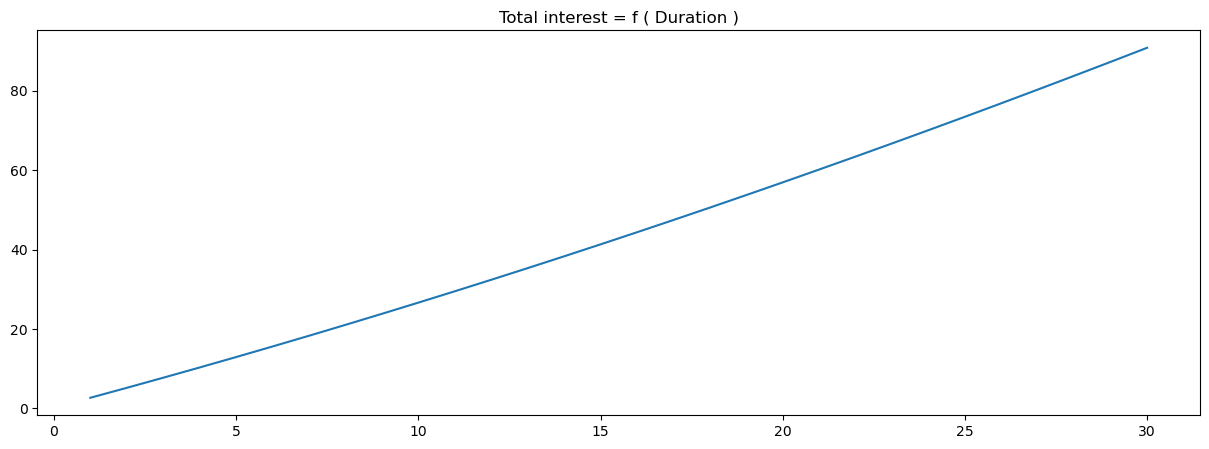

In [75]:
# impact of number of years on total interest in % of capital

years_range = range(1, 31)

total_interest = pd.DataFrame(index=years_range, columns=['total_interest'])

for years in years_range:
    loan = get_loan(capital=1000000, years=years, annual_interest_rate=0.05, fixed_monthly_payment=True)
    total_interest.loc[years] = loan['interest'].sum() / 1000000 * 100

total_interest.plot(figsize=(15, 5), title='Total interest = f ( Duration )', legend=False)

## Impact of annual interest rate

<Axes: title={'center': 'Total interest = f ( Annual interest rate )'}>

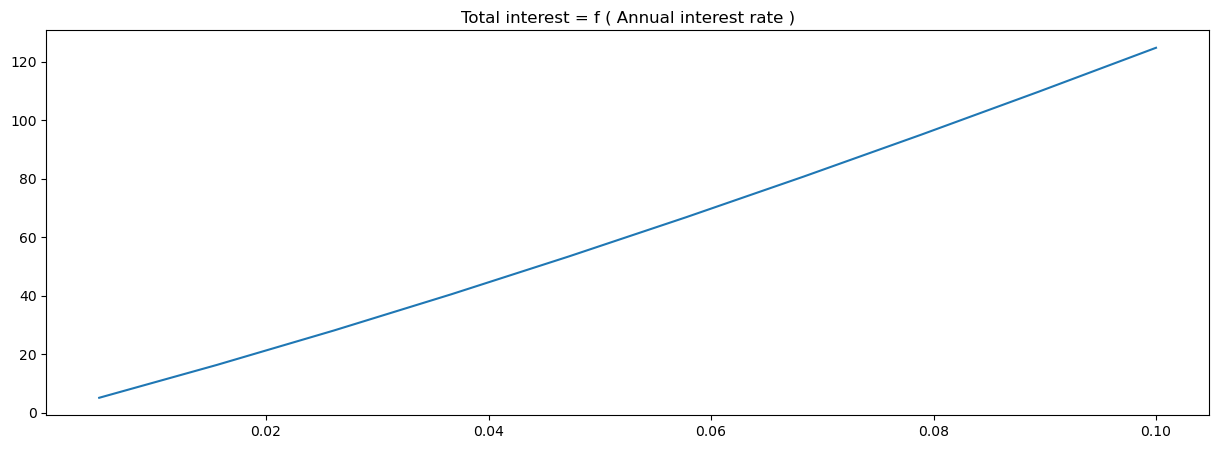

In [94]:
# impact of annual interest rate on total interest in % of capital

rates_range = np.linspace(0.005, 0.10, 10)

total_interest = pd.DataFrame(index=rates_range, columns=['total_interest'])

for rate in rates_range:
    loan = get_loan(capital=1000000, years=20, annual_interest_rate=rate, fixed_monthly_payment=True)
    total_interest.loc[rate] = loan['interest'].sum() / 1000000 * 100

total_interest.plot(figsize=(15, 5), title='Total interest = f ( Annual interest rate )', legend=False)